In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Crime Prediction in Chicago_Dataset.csv')

# Display the first 5 rows of the DataFrame
print("DataFrame Head:")
print(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Calculate and display the total number of missing values for each column
print("\nMissing Values per Column:")
print(df.isnull().sum())

DataFrame Head:
   Ward         Primary Type  Year   Latitude  Longitude
0     1              BATTERY  2022  22.339095  88.396919
1     1  MOTOR VEHICLE THEFT  2022  22.339108  88.380118
2     1  MOTOR VEHICLE THEFT  2022  22.339108  88.380118
3     1              ROBBERY  2022  22.339108  88.380118
4     1                THEFT  2022  22.339112  88.392130

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234889 entries, 0 to 234888
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Ward          234889 non-null  int64  
 1   Primary Type  234889 non-null  object 
 2   Year          234889 non-null  int64  
 3   Latitude      234889 non-null  float64
 4   Longitude     234889 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.0+ MB

Missing Values per Column:
Ward            0
Primary Type    0
Year            0
Latitude        0
Longitude       0
dtype: int64


In [2]:
print("Unique values in 'Primary Type' column:")
print(df['Primary Type'].unique())

print("\nData type of 'Ward' column:")
print(df['Ward'].dtype)

Unique values in 'Primary Type' column:
['BATTERY' 'MOTOR VEHICLE THEFT' 'ROBBERY' 'THEFT' 'OTHER OFFENSE'
 'ASSAULT' 'PUBLIC PEACE VIOLATION' 'ARSON' 'CRIMINAL DAMAGE' 'BURGLARY'
 'NARCOTICS' 'DECEPTIVE PRACTICE' 'INTIMIDATION' 'WEAPONS VIOLATION'
 'CRIMINAL TRESPASS' 'OFFENSE INVOLVING CHILDREN'
 'CRIMINAL SEXUAL ASSAULT' 'KIDNAPPING' 'OBSCENITY' 'LIQUOR LAW VIOLATION'
 'HOMICIDE' 'SEX OFFENSE' 'STALKING' 'INTERFERENCE WITH PUBLIC OFFICER'
 'CONCEALED CARRY LICENSE VIOLATION' 'PROSTITUTION' 'PUBLIC INDECENCY'
 'NON-CRIMINAL' 'HUMAN TRAFFICKING' 'GAMBLING' 'OTHER NARCOTIC VIOLATION']

Data type of 'Ward' column:
int64


In [31]:
unique_wards = df['Ward'].unique()
valid_ward_entered = False

while not valid_ward_entered:
    try:
        ward_number = int(input("Please enter a ward number for analysis: "))
        if ward_number in unique_wards:
            valid_ward_entered = True
            print(f"Ward number {ward_number} selected for analysis.")
        else:
            print("Invalid ward number. Please enter a ward number that exists in the dataset.")
            print(f"Available wards are: {sorted(unique_wards)}")
    except ValueError:
        print("Invalid input. Please enter an integer for the ward number.")

Please enter a ward number for analysis: 18
Ward number 18 selected for analysis.


In [32]:
ward_df = df[df['Ward'] == ward_number]

crime_type_counts = ward_df['Primary Type'].value_counts()

print(f"\nCrime Type Frequencies for Ward {ward_number}:")
print(crime_type_counts)


Crime Type Frequencies for Ward 18:
Primary Type
BATTERY                       128
THEFT                         107
ASSAULT                        75
CRIMINAL DAMAGE                70
MOTOR VEHICLE THEFT            62
WEAPONS VIOLATION              49
OTHER OFFENSE                  43
ROBBERY                        38
BURGLARY                       29
DECEPTIVE PRACTICE             23
NARCOTICS                      20
CRIMINAL TRESPASS               9
SEX OFFENSE                     4
ARSON                           3
OFFENSE INVOLVING CHILDREN      3
PUBLIC PEACE VIOLATION          1
INTIMIDATION                    1
STALKING                        1
CRIMINAL SEXUAL ASSAULT         1
Name: count, dtype: int64


In [33]:
total_crimes_ward = crime_type_counts.sum()
crime_type_percentages = (crime_type_counts / total_crimes_ward) * 100

print(f"\nPercentage Distribution of Crime Types for Ward {ward_number}:")
print(crime_type_percentages)


Percentage Distribution of Crime Types for Ward 18:
Primary Type
BATTERY                       19.190405
THEFT                         16.041979
ASSAULT                       11.244378
CRIMINAL DAMAGE               10.494753
MOTOR VEHICLE THEFT            9.295352
WEAPONS VIOLATION              7.346327
OTHER OFFENSE                  6.446777
ROBBERY                        5.697151
BURGLARY                       4.347826
DECEPTIVE PRACTICE             3.448276
NARCOTICS                      2.998501
CRIMINAL TRESPASS              1.349325
SEX OFFENSE                    0.599700
ARSON                          0.449775
OFFENSE INVOLVING CHILDREN     0.449775
PUBLIC PEACE VIOLATION         0.149925
INTIMIDATION                   0.149925
STALKING                       0.149925
CRIMINAL SEXUAL ASSAULT        0.149925
Name: count, dtype: float64


In [34]:
crime_distribution_df = pd.DataFrame({
    'Frequency': crime_type_counts,
    'Percentage': crime_type_percentages
})

print(f"\nCrime Type Frequencies and Percentages for Ward {ward_number}:")
print(crime_distribution_df)


Crime Type Frequencies and Percentages for Ward 18:
                            Frequency  Percentage
Primary Type                                     
BATTERY                           128   19.190405
THEFT                             107   16.041979
ASSAULT                            75   11.244378
CRIMINAL DAMAGE                    70   10.494753
MOTOR VEHICLE THEFT                62    9.295352
WEAPONS VIOLATION                  49    7.346327
OTHER OFFENSE                      43    6.446777
ROBBERY                            38    5.697151
BURGLARY                           29    4.347826
DECEPTIVE PRACTICE                 23    3.448276
NARCOTICS                          20    2.998501
CRIMINAL TRESPASS                   9    1.349325
SEX OFFENSE                         4    0.599700
ARSON                               3    0.449775
OFFENSE INVOLVING CHILDREN          3    0.449775
PUBLIC PEACE VIOLATION              1    0.149925
INTIMIDATION                        1    0.1499

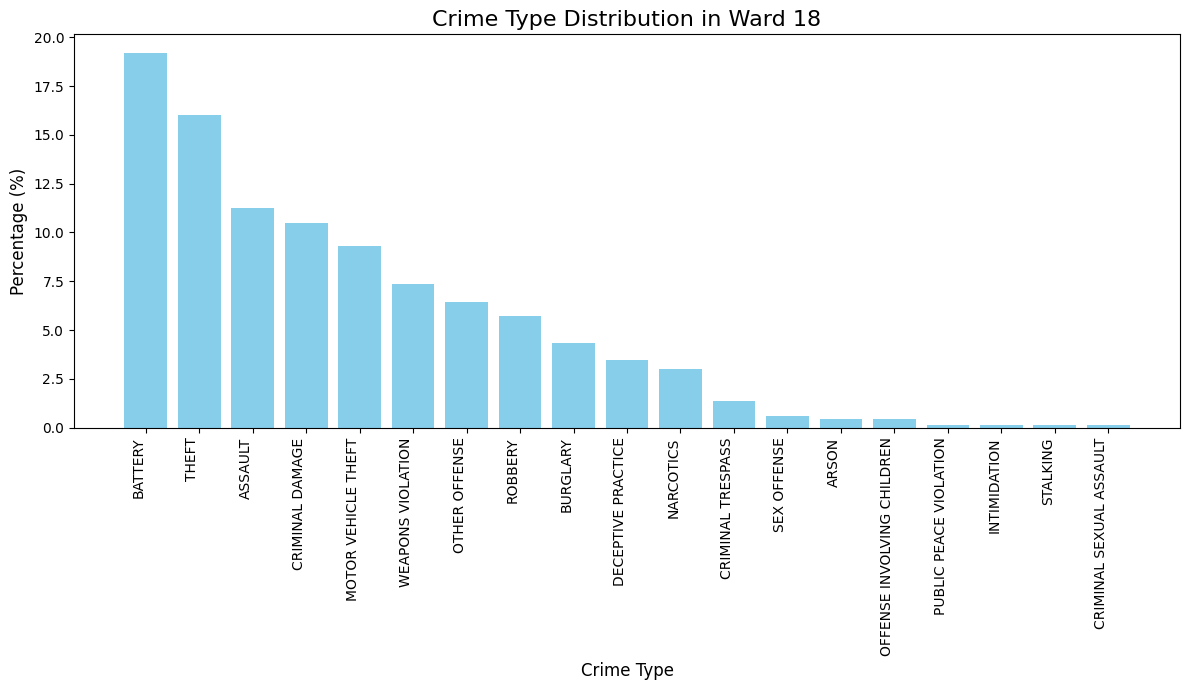

In [35]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(crime_distribution_df.index, crime_distribution_df['Percentage'], color='skyblue')

# Set title and labels
plt.title(f'Crime Type Distribution in Ward {ward_number}', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=10)

# Add a legend (though not strictly necessary for a single bar series, it's good practice)
# plt.legend(['Percentage'])

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [36]:
top_3_crimes = crime_distribution_df.sort_values(by='Frequency', ascending=False).head(3)

print("\nTop 3 Crime Types, Frequencies, and Percentages for the selected ward:")
print(top_3_crimes)


Top 3 Crime Types, Frequencies, and Percentages for the selected ward:
              Frequency  Percentage
Primary Type                       
BATTERY             128   19.190405
THEFT               107   16.041979
ASSAULT              75   11.244378


In [37]:
center_latitude = ward_df['Latitude'].mean()
center_longitude = ward_df['Longitude'].mean()

print(f"Central Latitude for Ward {ward_number}: {center_latitude}")
print(f"Central Longitude for Ward {ward_number}: {center_longitude}")

Central Latitude for Ward 18: 22.45482353509745
Central Longitude for Ward 18: 88.3712941489655


In [38]:
min_lat = ward_df['Latitude'].min()
max_lat = ward_df['Latitude'].max()
min_lon = ward_df['Longitude'].min()
max_lon = ward_df['Longitude'].max()

# Prepare polygon coordinates (a rectangle for simplicity based on min/max lat/lon)
polygon_coords = [
    [min_lat, min_lon],
    [max_lat, min_lon],
    [max_lat, max_lon],
    [min_lat, max_lon],
    [min_lat, min_lon] # Close the polygon
]

print(f"Minimum Latitude for Ward {ward_number}: {min_lat}")
print(f"Maximum Latitude for Ward {ward_number}: {max_lat}")
print(f"Minimum Longitude for Ward {ward_number}: {min_lon}")
print(f"Maximum Longitude for Ward {ward_number}: {max_lon}")
print("\nPolygon Coordinates:")
print(polygon_coords)

Minimum Latitude for Ward 18: 22.454533550000004
Maximum Latitude for Ward 18: 22.455125130000003
Minimum Longitude for Ward 18: 88.25193096999999
Maximum Longitude for Ward 18: 88.43703398999999

Polygon Coordinates:
[[22.454533550000004, 88.25193096999999], [22.455125130000003, 88.25193096999999], [22.455125130000003, 88.43703398999999], [22.454533550000004, 88.43703398999999], [22.454533550000004, 88.25193096999999]]


In [39]:
styled_html = f"""
<div style="font-family: Arial, sans-serif; font-size: 14px;">
    <p><span style="color: #1a73e8; font-weight: bold;">Ward:</span> {ward_number}</p>
    <p><span style="color: #34a853; font-weight: bold;">Total Crimes:</span> {total_crimes_ward}</p>
    <p><span style="color: #9c27b0; font-weight: bold;">Top 3 Crime Types:</span></p>
    <ul style="list-style-type: none; padding-left: 15px;">
"""
for crime_type, row in top_3_crimes.iterrows():
    styled_html += f'        <li><span style="color: #e91e63; font-size: 13px;">{crime_type}:</span> {row["Frequency"]} (<span style="color: #03a9f4;">{row["Percentage"]:.2f}%</span>)</li>\n'
styled_html += """    </ul>
</div>"""

In [40]:
import folium

m = folium.Map(location=[center_latitude, center_longitude], zoom_start=12)

folium.Marker(
    location=[center_latitude, center_longitude],
    popup=folium.Popup(styled_html, max_width=300)
).add_to(m)

folium.Polygon(
    locations=polygon_coords,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.2,
    tooltip=f"Crime Zone for Ward {ward_number}"
).add_to(m)

# Display the map
m

In [41]:
top_3_crime_names = top_3_crimes.index.tolist()

top_crimes_df = ward_df[ward_df['Primary Type'].isin(top_3_crime_names)]

print(f"DataFrame Head for Top 3 Crimes in Ward {ward_number}:")
print(top_crimes_df.head())

print(f"\nShape of the filtered DataFrame (top_crimes_df): {top_crimes_df.shape}")
print(f"Unique crime types in top_crimes_df: {top_crimes_df['Primary Type'].unique()}")

DataFrame Head for Top 3 Crimes in Ward 18:
       Ward Primary Type  Year   Latitude  Longitude
49052    18        THEFT  2022  22.454534  88.304466
49058    18      BATTERY  2022  22.454541  88.418774
49061    18      BATTERY  2022  22.454547  88.405300
49062    18        THEFT  2022  22.454547  88.405300
49070    18        THEFT  2022  22.454566  88.330038

Shape of the filtered DataFrame (top_crimes_df): (310, 5)
Unique crime types in top_crimes_df: ['THEFT' 'BATTERY' 'ASSAULT']


In [42]:
from folium.plugins import HeatMap

# Prepare data for heatmap: list of [latitude, longitude]
heatmap_data = top_crimes_df[['Latitude', 'Longitude']].values.tolist()

print(f"First 5 entries of heatmap data for Ward {ward_number}:")
print(heatmap_data[:5])
print(f"\nTotal number of points for heatmap: {len(heatmap_data)}")

First 5 entries of heatmap data for Ward 18:
[[22.45453358, 88.30446579], [22.45454117, 88.41877351], [22.45454699, 88.40530018999999], [22.45454699, 88.40530018999999], [22.454565750000004, 88.33003847999998]]

Total number of points for heatmap: 310


In [43]:
import folium
from folium.plugins import HeatMap
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=12)

folium.Marker(
    location=[center_latitude, center_longitude],
    popup=folium.Popup(styled_html, max_width=300)
).add_to(m)

folium.Polygon(
    locations=polygon_coords,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.2,
    tooltip=f"Crime Zone for Ward {ward_number}"
).add_to(m)

HeatMap(heatmap_data).add_to(m)

# Display the updated map
m